# 음식 추천 모델 

# 음식 추천 시스템 
- 봄, 여름, 가을, 겨울 = 학습
- 비(True or False) = 학습
- 음식 카테고리 = 결과값

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [3]:
df = pd.read_csv('cat_weather_dataset.csv', encoding='utf-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10814 entries, 0 to 10813
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10814 non-null  int64  
 1   카테고리        10814 non-null  object 
 2   time        10814 non-null  object 
 3   강수량         10814 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 338.1+ KB


In [24]:
x= df['카테고리'].value_counts().keys()
y= df['카테고리'].value_counts().values

Text(0, 0.5, '지점 수')

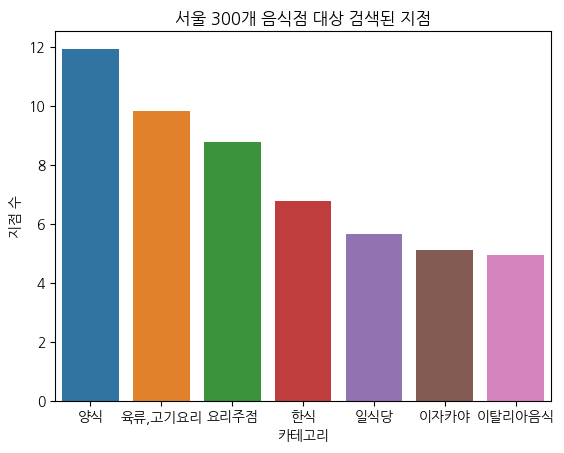

In [36]:
sns.barplot(x=x[:7], y=y[:7]/100, hue=x[:7])
plt.title('서울 300개 음식점 대상 검색된 지점')
plt.ylabel('지점 수')

Text(0, 0.5, '지점 수')

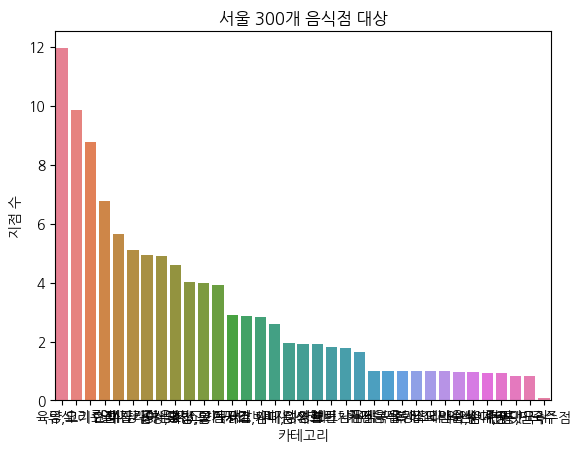

In [35]:
sns.barplot(x=x, y=y/100, hue=x)
plt.title('서울 300개 음식점 대상')
plt.ylabel('지점 수')

In [44]:
li=[]

for val in df['강수량']:
    if 0<val:
        li.append(1)
    else:
        li.append(0)
li

[0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,


In [45]:
df['비'] = li
df

,Unnamed: 0,카테고리,time,강수량,비
0,0,이탈리아음식,2024-05-27,0.0,0
1,1,이탈리아음식,2024-07-05,4.1,1
2,2,이탈리아음식,2024-06-13,0.0,0
3,3,이탈리아음식,2024-06-19,0.0,0
4,4,이탈리아음식,2024-05-03,0.0,0
...,...,...,...,...,...
10809,10809,피자,2023-04-23,0.0,0
10810,10810,피자,2023-04-21,0.0,0
10811,10811,피자,2023-06-16,0.0,0
10812,10812,피자,2023-01-01,0.0,0


In [54]:
row =df[df['비']==1]
len(row['카테고리'].value_counts()), len(df['카테고리'].value_counts())

(35, 35)

In [55]:
li = []
for i in range(len(row['카테고리'].value_counts())):
    li.append(row['카테고리'].value_counts()[i]/df['카테고리'].value_counts()[i])

li

C:\Users\Admin\AppData\Local\Temp\ipykernel_4128\3253546759.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  li.append(row['카테고리'].value_counts()[i]/df['카테고리'].value_counts()[i])
C:\Users\Admin\AppData\Local\Temp\ipykernel_4128\3253546759.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  li.append(row['카테고리'].value_counts()[i]/df['카테고리'].value_counts()[i])
C:\Users\Admin\AppData\Local\Temp\ipykernel_4128\3253546759.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

[0.29061976549413737,
 0.3231707317073171,
 0.3127853881278539,
 0.2717872968980798,
 0.31560283687943264,
 0.32421875,
 0.3111111111111111,
 0.310838445807771,
 0.3188720173535792,
 0.3349875930521092,
 0.3165829145728643,
 0.29743589743589743,
 0.3944636678200692,
 0.34265734265734266,
 0.3191489361702128,
 0.3488372093023256,
 0.3402061855670103,
 0.31088082901554404,
 0.31088082901554404,
 0.3149171270718232,
 0.29608938547486036,
 0.28484848484848485,
 0.42,
 0.35,
 0.32,
 0.31,
 0.30303030303030304,
 0.29292929292929293,
 0.29591836734693877,
 0.28421052631578947,
 0.27956989247311825,
 0.2717391304347826,
 0.2857142857142857,
 0.25609756097560976,
 0.4444444444444444]

In [64]:
row['카테고리'].value_counts().keys()[:7]

Index(['양식', '육류,고기요리', '요리주점', '한식', '일식당', '이자카야', '이탈리아음식'], dtype='object', name='카테고리')

In [84]:
li

[0.29061976549413737,
 0.3231707317073171,
 0.3127853881278539,
 0.2717872968980798,
 0.31560283687943264,
 0.32421875,
 0.3111111111111111,
 0.310838445807771,
 0.3188720173535792,
 0.3349875930521092,
 0.3165829145728643,
 0.29743589743589743,
 0.3944636678200692,
 0.34265734265734266,
 0.3191489361702128,
 0.3488372093023256,
 0.3402061855670103,
 0.31088082901554404,
 0.31088082901554404,
 0.3149171270718232,
 0.29608938547486036,
 0.28484848484848485,
 0.42,
 0.35,
 0.32,
 0.31,
 0.30303030303030304,
 0.29292929292929293,
 0.29591836734693877,
 0.28421052631578947,
 0.27956989247311825,
 0.2717391304347826,
 0.2857142857142857,
 0.25609756097560976,
 0.4444444444444444]

In [86]:
per = pd.DataFrame({'카테고리': row['카테고리'].value_counts().keys(), '방문율':li})

In [93]:
per = per.sort_values(by='방문율', ascending=False)
per

,카테고리,방문율
34,국수,0.444444
22,닭볶음탕,0.420000
12,닭갈비,0.394464
23,와인,0.350000
15,"멕시코,남미음식",0.348837
13,돈가스,0.342657
16,생선회,0.340206
9,"곱창,막창,양",0.334988
5,이자카야,0.324219
1,"육류,고기요리",0.323171


Text(0.5, 1.0, '비오는날 사람들이 찾는 음식점 카테고리 비율')

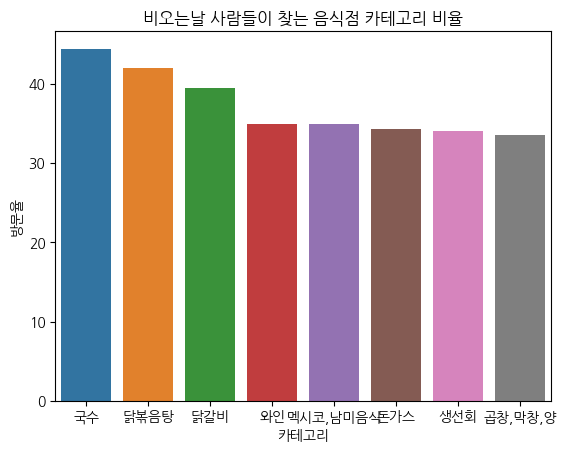

In [95]:
sns.barplot(x=per['카테고리'][:8], y=per['방문율'][:8]*100, hue=per['카테고리'][:8])
plt.title('비오는날 사람들이 찾는 음식점 카테고리 비율')

In [92]:
df

,Unnamed: 0,카테고리,time,강수량,비
0,0,이탈리아음식,2024-05-27,0.0,0
1,1,이탈리아음식,2024-07-05,4.1,1
2,2,이탈리아음식,2024-06-13,0.0,0
3,3,이탈리아음식,2024-06-19,0.0,0
4,4,이탈리아음식,2024-05-03,0.0,0
...,...,...,...,...,...
10809,10809,피자,2023-04-23,0.0,0
10810,10810,피자,2023-04-21,0.0,0
10811,10811,피자,2023-06-16,0.0,0
10812,10812,피자,2023-01-01,0.0,0
